# Titanic Survivor prediction

# 1. Problem and Motivation

## 1.1 Our goal:
Predict survival on the Titanic

## 1.2 Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

# 2. Data understanding and visulization

## 2.1 Import packages

In [4]:

# Handle table-like data and matrices calculation
import numpy as np
import scipy as sp
import pandas as pd


# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns


# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier



%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

## 2.2 Load Data

In [8]:
train=pd.read_csv('train.csv',sep=',')
test    = pd.read_csv("test.csv",sep=',')

full = train.append( test , ignore_index = True )
titanic = full[ :891 ]

print "lenth Of Train:", len(train), "lenth Of Test:",len(test)

print 'Datasets:' , 'full:' , full.shape , 'titanic:' , titanic.shape


lenth Of Train: 891 lenth Of Test: 418
Datasets: full: (1309, 12) titanic: (891, 12)


## 2.3 Statistical summaries and visualisations

To understand the data we are now going to consider some key facts about various variables including their relationship with the target variable, i.e. survival.
We start by looking at a few lines of the data

In [9]:
# Run the code to see the variables, then read the variable description below to understand them.
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Age            714 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Survived       891 non-null float64
Ticket         891 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 66.2+ KB


In [11]:
titanic.describe(include="all")

C:\Users\Tsymbal Group Member\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,714.000000,204,889,891.000000,891,891.000000,891.000000,891.000000,891,891.000000,891.000000,891
unique,NaN,147,3,NaN,891,NaN,NaN,NaN,2,NaN,NaN,681
top,NaN,C23 C25 C27,S,NaN,"Graham, Mr. George Edward",NaN,NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,4,644,NaN,1,NaN,NaN,NaN,577,NaN,NaN,7
mean,29.699118,NaN,NaN,32.204208,NaN,0.381594,446.000000,2.308642,NaN,0.523008,0.383838,NaN
std,14.526497,NaN,NaN,49.693429,NaN,0.806057,257.353842,0.836071,NaN,1.102743,0.486592,NaN
min,0.420000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,7.910400,NaN,0.000000,223.500000,2.000000,NaN,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,14.454200,NaN,0.000000,446.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,31.000000,NaN,0.000000,668.500000,3.000000,NaN,1.000000,1.000000,NaN


**Variable Description (From Kaggle webpage of this project)**

 - Survived: Survived (1) or died (0)
 - Pclass: Passenger's class
 - Name: Passenger's name
 - Sex: Passenger's sex
 - Age: Passenger's age
 - SibSp: Number of siblings/spouses aboard
 - Parch: Number of parents/children aboard
 - Ticket: Ticket number
 - Fare: Fare
 - Cabin: Cabin
 - Embarked: Port of embarkation
 

### 2.4.1 Next have a look at some key information about the variables
An numeric variable is one with values of integers or real numbers while a categorical variable is a variable that can take on one of a limited, and usually fixed, number of possible values, such as blood type.

Notice especially what type of variable each is, how many observations there are and some of the variable values.

An interesting observation could for example be the minimum age 0.42, do you know why this is?


In [12]:
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,NaN,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,NaN,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


### 2.4.2 A heat map of correlation may give us a understanding of which variables are important

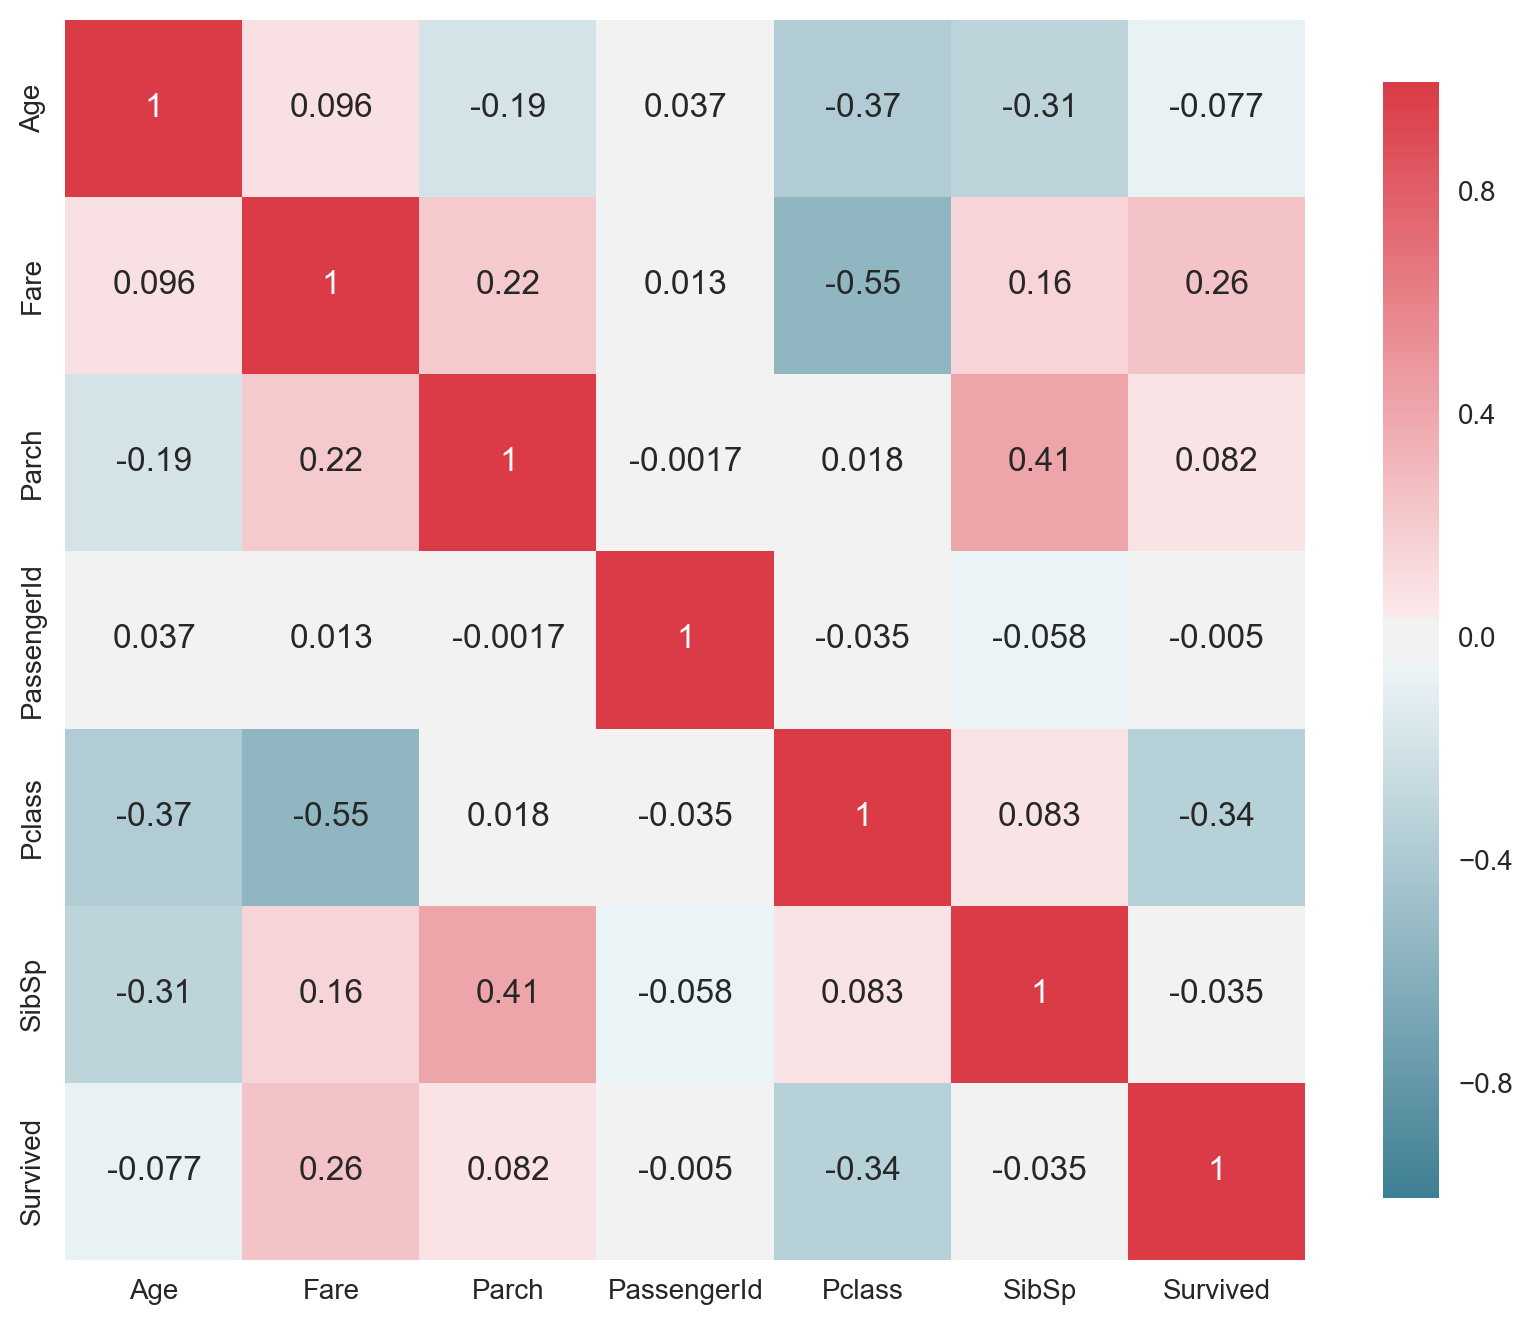

In [14]:
corr = titanic.corr()
figure, ax = plt.subplots( figsize =( 10 , 8 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
correlation = sns.heatmap(corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })